# WORD CLOUD PROJECT

For this project, you'll create a "word cloud" from a text by writing a script. This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words. A dictionary is the output of the calculate_frequencies function. The wordcloud module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only. For the text itself, you can copy and paste the contents of a website you like. Or you can use a site like [Project Gutenberg](https://www.gutenberg.org) to find books that are available online. You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.

In [ ]:
# Required installations
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets

In [1]:
# Here are all the imports you will need for your word cloud script and uploader widget
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
from PIL import Image
import io
import sys

In [2]:
! wget -O Sherlock_Holmes.txt https://www.gutenberg.org/files/1661/1661-0.txt

--2020-07-03 13:29:00--  https://www.gutenberg.org/files/1661/1661-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607791 (594K) [text/plain]
Saving to: 'Sherlock_Holmes.txt'

     0K .......... .......... .......... .......... ..........  8% 31.2K 17s
    50K .......... .......... .......... .......... .......... 16% 52.6K 13s
   100K .......... .......... .......... .......... .......... 25%  150K 9s
   150K .......... .......... .......... .......... .......... 33% 78.8K 7s
   200K .......... .......... .......... .......... .......... 42% 52.3K 6s
   250K .......... .......... .......... .......... .......... 50%  141K 5s
   300K .......... .......... .......... .......... .......... 58% 79.3K 4s
   350K .......... .......... .......... .......... .......... 67% 79.7K 3s
   400K ..........

In [3]:
file = open('Sherlock_Holmes.txt', 'r',encoding='utf-8').read()

Hints: 
1.   split() function for splitting the words
2.   isalpha() for detecting a non-alphabetical character
3.   the format of dictionary: keys = word , value = frequency of the word



In [4]:
def generate_cloud(file,mask=None,background_color="black"):
    # Here is a list of punctuations and  stopwords you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    my_list = ['will', 'may', 'might', 'yes', 'us', 'much', 'now', 'must', 'yet', 'mr', 'many', 'one', 'two', 'three', 'first', 'lot', 'need', 'us', 'use', 'way', 'well', 'will', 'less', 'give', 'tell', 'take', 'come', 'said', 'really', 'mrs', 'see', 'go', 'little', 'see', 'say', 'came', 'made', 'let', 'every', 'seen', 'st', 'upon', 'saw', 'got', 'given', 'five', 'ask', 'make', 'put', 'know', 'knew', 'gave', 'go']
    stopwords = list(STOPWORDS)+my_list
    
    # TYPE YOUR MAIN CODE HERE
    frequencies = {}
    
    clean_text = ""
    for char in file:
      if char.isalpha() == True or char.isspace():
        clean_text += char 
            
    words = clean_text.split()
    
    filter_words = [word.lower() for word in words if word.lower() not in stopwords]
    
    for item in filter_words:
      frequencies[item] = frequencies.get(item,0)+1

    #wordcloud
    wc = WordCloud(width=2160, height=1080,mask=mask,background_color=background_color)
    wc.generate_from_frequencies(frequencies)
    return wc

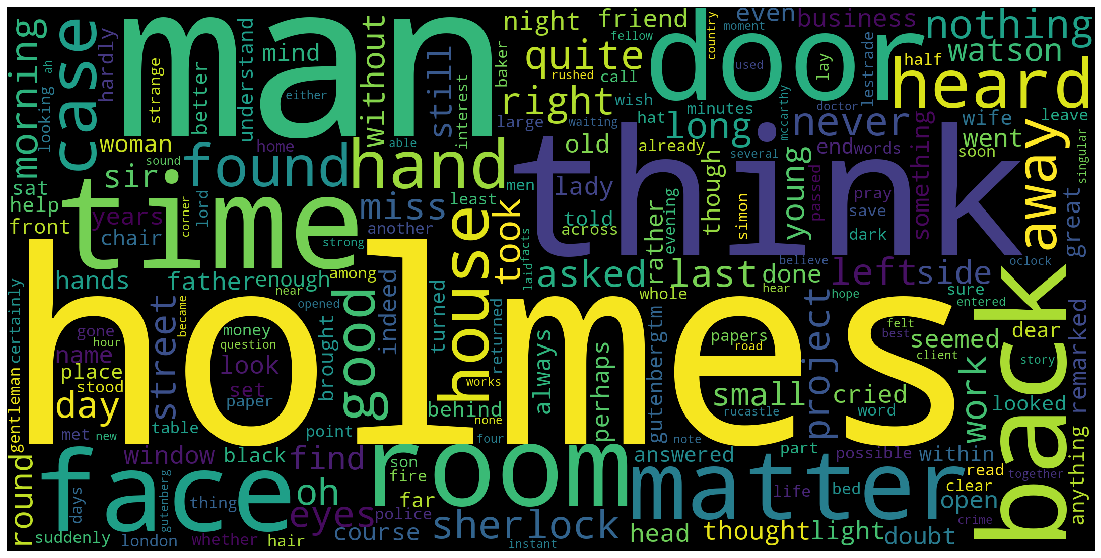

In [5]:
# Display your wordcloud image
cloud = generate_cloud(file)

plt.figure(figsize=(20,10))
plt.imshow(cloud)
plt.axis('off')
name = "Result"                                 
plt.savefig("{}.jpeg".format(name),quality=95)
plt.show();

In [6]:
!wget -O Holmes.jpg https://www.denofgeek.com/wp-content/uploads/2017/01/sherlock_holmes_1.jpg?resize=620%2C384

--2020-07-03 13:29:53--  https://www.denofgeek.com/wp-content/uploads/2017/01/sherlock_holmes_1.jpg?resize=620%2C384
Resolving www.denofgeek.com (www.denofgeek.com)... 192.0.66.88, 2a04:fa87:fffd::c000:4258
Connecting to www.denofgeek.com (www.denofgeek.com)|192.0.66.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34326 (34K) [image/jpeg]
Saving to: 'Holmes.jpg'

     0K .......... .......... .......... ...                  100%  349K=0.1s

2020-07-03 13:29:53 (349 KB/s) - 'Holmes.jpg' saved [34326/34326]



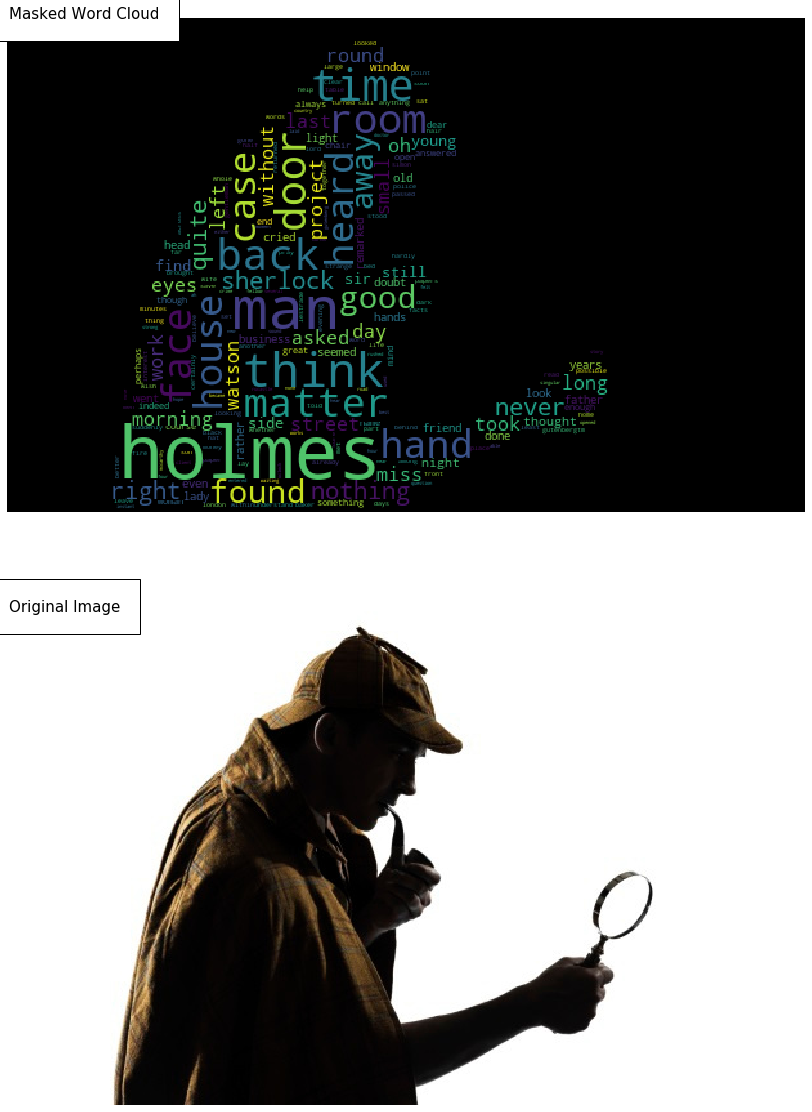

In [7]:
#masked word cloud

mask_image = np.array(Image.open("Holmes.jpg"))
cloud = generate_cloud(file,mask=mask_image)

#Displaying images
fig,ax = plt.subplots(2,1,figsize=(20,20))  

ax[0].imshow(cloud)
ax[0].text(1,0,'Masked Word Cloud',fontsize=15, bbox={'facecolor': 'white', 'pad': 20})
ax[1].imshow(mask_image)
ax[1].text(1,0,'Original Image',fontsize=15, bbox={'facecolor': 'white', 'pad': 20})
ax[0].axis("off")
ax[1].axis("off");